<a href="https://colab.research.google.com/github/Kasrakko/PyTorch-Deep-Learning/blob/main/NN_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
, torch_version
import torch 
from torch import nn
import pandas as pd
import numpy as nm
import matplotlib.pyplot as plt
torch.__version__

'1.13.1+cu116'

***What we are doing here is:***

1. data (prepare and load)
2. building model
3. fitting the model to data (training)
4. making prediction and evaluting model (inference)
5. saving and loading a model
6. putting it all together

## Data preparing and loading

Data can be anythings 
* Excel sheets 
* Image of any kind
* Audio
* Videos
* Text 
* DNA
* etc

Machin learning is a game oftwo parts:
1. Get data into a numerical representation.
2. Build a model to learn pattern in that numerical representation 

To showcase this, lets create some *known* data using the linear regrrion formula.

### Get data into a numerical representation

In [27]:
# create *known* parameters
weight = 0.7
bias = 0.3

# Create
start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1) # Inputs
y = weight * X + bias # Outputs

X[:10], y[:10], len(X), len(y)

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]), tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]), 50, 50)

### Spliting datasets to training and test sets

In [28]:
# Create train/test split
train_split = int(0.8 * len(X))
#train_split
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]
len(X_train), len(X_test), len(y_train), len(y_test)

(40, 10, 40, 10)

### Visualize data

In [29]:
def plot_prediction(train_data=X_train,
                    train_labels=y_train,
                    test_data=X_test,
                    test_labels=y_test,
                    predictions=None):
  "\n Plots training data, test data and compares predictions."
  plt.figure(figsize=(10, 7))

#plot trainig data in blue
  plt.scatter(train_data, train_labels, c="b", s=4, label="training data")

# plot test data in green
  plt.scatter(test_data, test_labels, c="g", s=4, label="testing data")

# Are there predictions?
  if predictions is not None:
  # plot the predictions if they exist
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

  # Show the legend
    plt.legend(prop={"size" : 14});

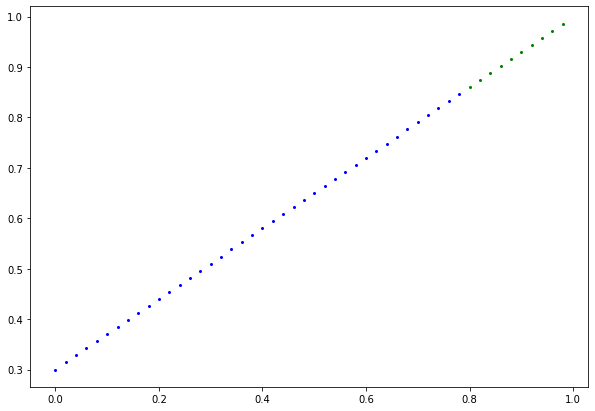

In [32]:
plot_prediction();

In [ ]:
# Build model
# Create a linear regrresion model
class LinearReggresionModel(nn.Moudule)
  def __init__(self):
    super().__init__()
    self.weights = nn.Parameter(torch.rand(1, 
                                           requires_grad=True, 
                                           dtype=torch.float))
    self.bias = nn.Parameter(torch.rand(1, 
                                           requires_grad=True, 
                                           dtype=torch.float))
    # Forward methde
    def forward(self, x: torch.Tensor) -> torch.Tensor:
      return self.weights * X + self.bias 